In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import fasttext
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju', '-']

In [3]:
stop_tekst = []
with open("stop_s.txt", "r", encoding = 'utf8') as file:
    for line in file:
        #print(line.rstrip())
        stop_tekst.append(line.rstrip())

In [4]:
len(stop_tekst)

5001

In [5]:
# Veamaatriks (plot the confusion matrix)
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Segadusmaatriks',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normaliseeritud segadusmaatriks")
    else:
        print('Normaliseerimata segadusmaatriks')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
    plt.ylabel('Tõeline märgend')
    plt.xlabel('Prognoositud märgend')

In [6]:
data = pd.read_excel('toofailid/DATA_TEKSTIKOGU_puhastatud.xlsx', engine='openpyxl')
print(data.shape)

(636, 55)


In [7]:
label = data['Lahendi liik'].to_list()
labels = data.iloc[:, 16].apply(lambda x: '__label__' + str(x))

In [8]:
data.insert(1, "label", labels)

In [9]:
pr = data['text_token'].to_list()

In [10]:
artiklid = []
for i in range(len(pr)):
    art = []
    for el in pr[i].split():
        #print(el)
        if el not in stopsõnad_uus:
            #print(el)
            art.append(el)
        artikkel = ' '.join(art)
    artiklid.append(artikkel)

In [11]:
data['text_token_stop'] = artiklid

In [12]:
len(artiklid)

636

In [13]:
X = data['text_lemmatize']
y = data['label']
train_df, test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [14]:
train_df

31     kohus arutama põhjalikult kas fekaalid määrima...
427    klient leidma et swedbank pidama võlgu tagasi ...
610    poliitik pidama kahetsusväärne olukord kus tap...
499    see lood ilmumine järel tulema postimees tõenä...
105    patsient minema ilukliinik suur ootus mis juht...
                             ...                        
198    kui edaspidi pidama keegi huvi tundma kust min...
93     koos kolm sõbranna mööduma neljapäev õhtu tall...
54     metsatööstur ja lageraie vajalikkus jutlustama...
356    tunduma et keskerakond olema saama iseenesestm...
489    kohtulugu • eile tartu ringkonnakohus toimuma ...
Name: text_lemmatize, Length: 508, dtype: object

In [15]:
# Treenimisandmestik tekstifaili
#train = train_df.to_list()
#train_label = y_train.to_list()
#tekstid = list(map(lambda x, y: x+ ' ' +y, train_label, train))
tekstid = list(map(lambda x, y: x+ ' ' +y, y_train, train_df))
textfile = open('train_lemma.txt', "w", encoding = 'utf8')
for element in tekstid:
    textfile.write(element + "\n")
textfile.close()

In [16]:
# Testandmestik tekstifaili
#train = train_df.to_list()
#train_label = y_train.to_list()
#tekstid = list(map(lambda x, y: x+ ' ' +y, train_label, train))
tekstid = list(map(lambda x, y: x+ ' ' +y, y_test, test_df))
textfile = open('test_lemma.txt', "w", encoding = 'utf8')
for element in tekstid:
    textfile.write(element + "\n")
textfile.close()

In [54]:
# Lemmad
model1 = fasttext.train_supervised(input = 'train_lemma.txt',
                                  epoch=35, 
                                  lr = 0.5,
                                  dim = 300)

                        precision    recall  f1-score   support

       __label__tauniv       0.51      0.33      0.40        58
__label__õigeksmõistev       0.57      0.74      0.65        70

             micro avg       0.55      0.55      0.55       128
             macro avg       0.54      0.54      0.52       128
          weighted avg       0.55      0.55      0.53       128

Normaliseerimata segadusmaatriks


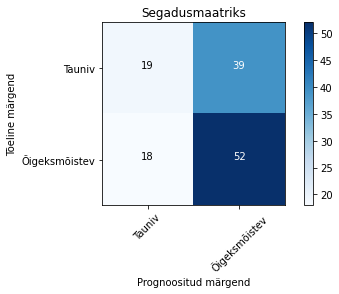

In [55]:
# Mudeli põhjal test-andmestiku väärtuste prognoosimine
y_pred1 = []
for t in test_df:
    ennustus = model1.predict(t)[0][0]
    y_pred1.append(ennustus)
print(classification_report(y_test, y_pred1))
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [28]:
model2 = fasttext.train_supervised(input = 'train_lemma.txt',
                                   dim = 300,
                                   lr = 0.5,
                                   epoch = 25,
                                   pretrainedVectors='cc.et.300.vec')

                        precision    recall  f1-score   support

       __label__tauniv       0.47      0.31      0.38        58
__label__õigeksmõistev       0.56      0.71      0.63        70

             micro avg       0.53      0.53      0.53       128
             macro avg       0.51      0.51      0.50       128
          weighted avg       0.52      0.53      0.51       128

Normaliseerimata segadusmaatriks


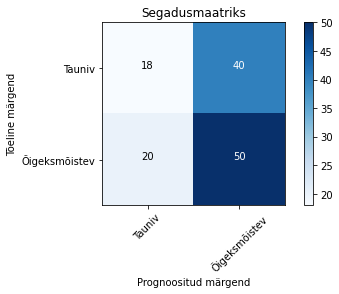

In [29]:
y_pred2 = []
for t in test_df:
    ennustus = model2.predict(t)[0][0]
    y_pred2.append(ennustus)
print(classification_report(y_test, y_pred2))
cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [32]:
model3 = fasttext.train_supervised(input = 'train_lemma.txt',
                                  dim = 300,
                                  lr = 0.5,
                                  epoch = 25,
                                  pretrainedVectors='wiki.et.vec')

                        precision    recall  f1-score   support

       __label__tauniv       0.54      0.38      0.44        58
__label__õigeksmõistev       0.59      0.73      0.65        70

             micro avg       0.57      0.57      0.57       128
             macro avg       0.56      0.55      0.55       128
          weighted avg       0.56      0.57      0.56       128

Normaliseerimata segadusmaatriks


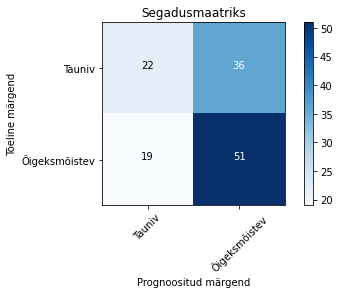

In [33]:
y_pred3 = []
for t in test_df:
    ennustus = model3.predict(t)[0][0]
    y_pred3.append(ennustus)
print(classification_report(y_test, y_pred3))
cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])